## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
from keras.layers import Dropout
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
def build_mlp_more(input_shape, output_units=10, num_neurons=[512, 256, 128, 64, 32], drp_ratio=0.2):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
Dropout_EXP = [0.2, 0.5, 0.7]
Models = [build_mlp, build_mlp_more]

In [8]:
results = {}

for dropout_exp, build in itertools.product(Dropout_EXP, Models):
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Dropout = %.2f, Build_way = %s" % (dropout_exp, build))
    model = build(input_shape=x_train.shape[1:], drp_ratio=dropout_exp)
    model.summary()
    optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS,
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-dropout-%s-build way-%s" % (str(dropout_exp), str(build))
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Dropout = 0.20, Build_way = <function build_mlp at 0x00000186EC177CA8>
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
______________________________________

50000/50000 [==============================] - 11s 213us/step - loss: 1.3891 - accuracy: 0.5008 - val_loss: 1.3928 - val_accuracy: 0.5037
Epoch 46/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.3911 - accuracy: 0.5001 - val_loss: 1.3946 - val_accuracy: 0.5009
Epoch 47/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.3870 - accuracy: 0.5021 - val_loss: 1.3952 - val_accuracy: 0.5119
Epoch 48/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.3811 - accuracy: 0.5052 - val_loss: 1.3966 - val_accuracy: 0.5010
Epoch 49/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.3802 - accuracy: 0.5036 - val_loss: 1.3737 - val_accuracy: 0.5126
Epoch 50/50
50000/50000 [==============================] - 9s 182us/step - loss: 1.3780 - accuracy: 0.5050 - val_loss: 1.3865 - val_accuracy: 0.5038
Experiment with Dropout = 0.20, Build_way = <function build_mlp_more at 0x00000186F56140D8>
Model: "model_1"
_____

Epoch 36/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.6051 - accuracy: 0.4312 - val_loss: 1.5234 - val_accuracy: 0.4529
Epoch 37/50
50000/50000 [==============================] - 12s 234us/step - loss: 1.6046 - accuracy: 0.4324 - val_loss: 1.5138 - val_accuracy: 0.4624
Epoch 38/50
50000/50000 [==============================] - 12s 245us/step - loss: 1.5941 - accuracy: 0.4339 - val_loss: 1.5119 - val_accuracy: 0.4584
Epoch 39/50
50000/50000 [==============================] - 12s 246us/step - loss: 1.5932 - accuracy: 0.4339 - val_loss: 1.5380 - val_accuracy: 0.4535
Epoch 40/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.5948 - accuracy: 0.4343 - val_loss: 1.5158 - val_accuracy: 0.4610
Epoch 41/50
50000/50000 [==============================] - 12s 237us/step - loss: 1.5875 - accuracy: 0.4343 - val_loss: 1.5375 - val_accuracy: 0.4520
Epoch 42/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.5847 - accuracy:

50000/50000 [==============================] - 10s 196us/step - loss: 1.9674 - accuracy: 0.2581 - val_loss: 2.0003 - val_accuracy: 0.2757
Epoch 31/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.9626 - accuracy: 0.2571 - val_loss: 1.9661 - val_accuracy: 0.2700
Epoch 32/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.9678 - accuracy: 0.2571 - val_loss: 1.9939 - val_accuracy: 0.2745
Epoch 33/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.9681 - accuracy: 0.2558 - val_loss: 2.0201 - val_accuracy: 0.2801
Epoch 34/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.9584 - accuracy: 0.2627 - val_loss: 1.9656 - val_accuracy: 0.2840
Epoch 35/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.9488 - accuracy: 0.2667 - val_loss: 1.9843 - val_accuracy: 0.2729
Epoch 36/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.9557 - accuracy: 0.2689 - va

50000/50000 [==============================] - 12s 241us/step - loss: 2.1103 - accuracy: 0.1747 - val_loss: 2.1715 - val_accuracy: 0.1592 
Epoch 21/50
50000/50000 [==============================] - 12s 247us/step - loss: 2.1096 - accuracy: 0.1748 - val_loss: 2.2310 - val_accuracy: 0.1300
Epoch 22/50
50000/50000 [==============================] - 12s 239us/step - loss: 2.1060 - accuracy: 0.1782 - val_loss: 2.2205 - val_accuracy: 0.1266
Epoch 23/50
50000/50000 [==============================] - 12s 241us/step - loss: 2.1005 - accuracy: 0.1793 - val_loss: 2.2055 - val_accuracy: 0.1420
Epoch 24/50
50000/50000 [==============================] - 13s 252us/step - loss: 2.1028 - accuracy: 0.1812 - val_loss: 2.2020 - val_accuracy: 0.1459
Epoch 25/50
50000/50000 [==============================] - 13s 253us/step - loss: 2.0973 - accuracy: 0.1813 - val_loss: 2.1991 - val_accuracy: 0.1483
Epoch 26/50
50000/50000 [==============================] - 13s 251us/step - loss: 2.1040 - accuracy: 0.1793 - v

50000/50000 [==============================] - 9s 190us/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 15/50
50000/50000 [==============================] - 10s 205us/step - loss: 2.3027 - accuracy: 0.0979 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 16/50
50000/50000 [==============================] - 10s 190us/step - loss: 2.3027 - accuracy: 0.0967 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 17/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3027 - accuracy: 0.0996 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 18/50
50000/50000 [==============================] - 10s 191us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 19/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.3027 - accuracy: 0.0984 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 20/50
50000/50000 [==============================] - 9s 187us/step - loss: 2.3027 - accuracy: 0.0979 - val_lo

50000/50000 [==============================] - 9s 180us/step - loss: 2.3027 - accuracy: 0.0968 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.3027 - accuracy: 0.0977 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.3027 - accuracy: 0.0987 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 8/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.3027 - accuracy: 0.0965 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 9/50
50000/50000 [==============================] - 9s 179us/step - loss: 2.3027 - accuracy: 0.0975 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 10/50
50000/50000 [==============================] - 9s 181us/step - loss: 2.3027 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 11/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.

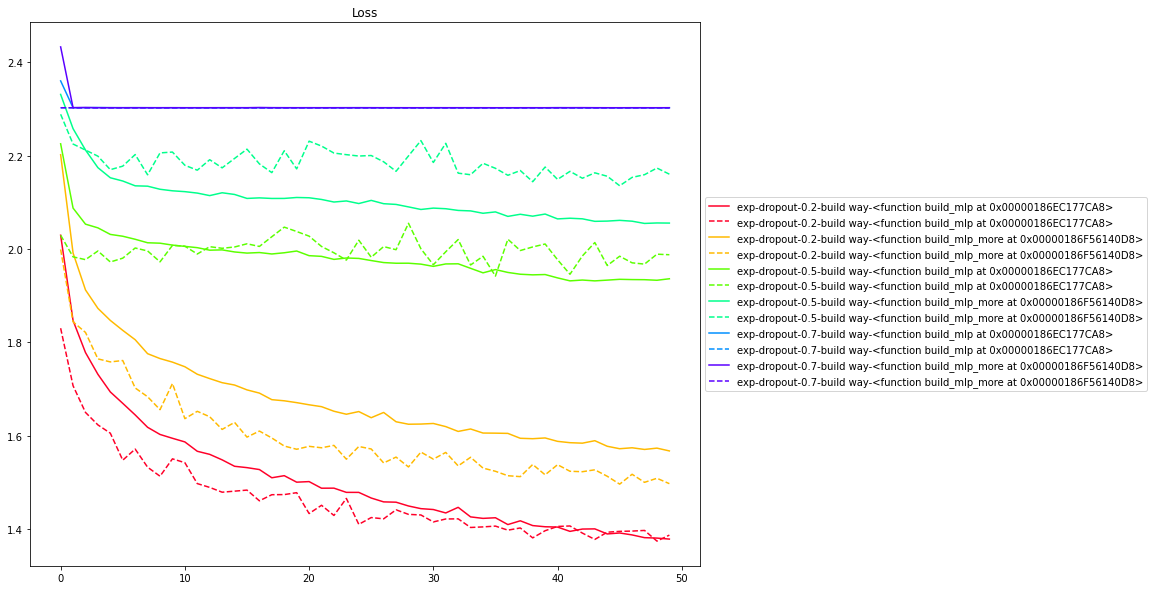

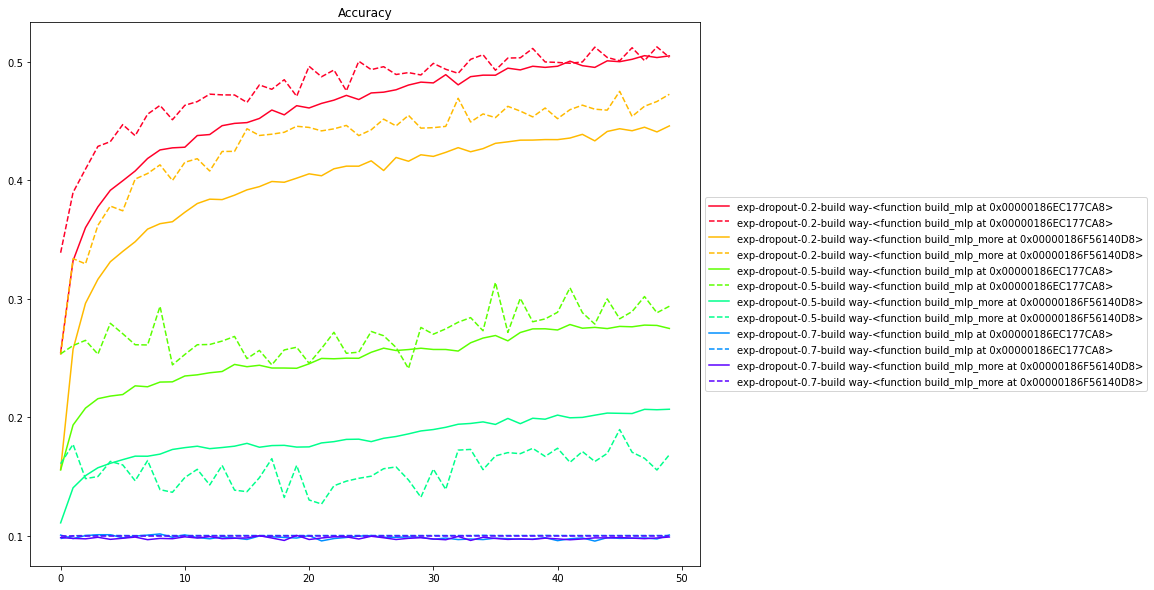

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
    
NUM_COLORS = len(results.keys())
cm = plt.get_cmap('gist_rainbow')
color_bar = [cm(1.*i/NUM_COLORS) for i in range(NUM_COLORS)]

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.figure(figsize=(12,10))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()